In [3]:
#!pip install opencv-python
#!pip install pillow

In [5]:
import cv2
import os
import PIL

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Download Images

In [6]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228818944/228813984 [==============================] - 204s 1us/step


In [7]:
data_dir

'.\\datasets\\flower_photos'

### Build image dir path

In [8]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

### Count list of images

In [10]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3592

### Get List of roses images

In [13]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

### View Rose Flower 1

(320, 240)


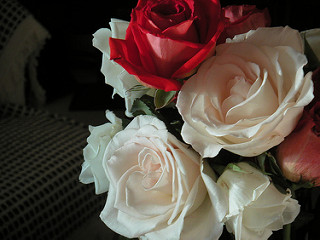

In [19]:
print(PIL.Image.open(str(roses[1])).size)
PIL.Image.open(str(roses[1]))


### Create Dict of images and folder path

In [42]:
flower_image_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

### Flowers in dict label

In [21]:
flower_labels_classes = {'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}

### Convert images in 3 dim array using open cv

In [23]:
img = cv2.imread(str(roses[1]))
img.shape

(240, 320, 3)

### Resize images into lower pixel size

In [38]:
cv2.resize(img, (224, 224)).shape

(224, 224, 3)

### View 3 dim array in plot

Text(0.5, 0, 'roses')

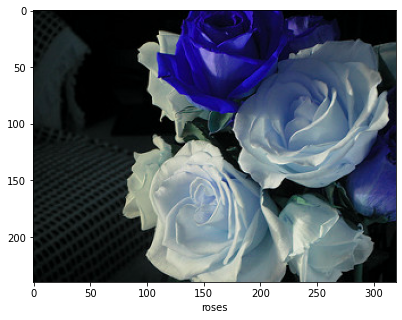

In [36]:
plt.figure(figsize = (15,5))
plt.imshow(img)
plt.xlabel('roses')

### Convert images into array and create train dataset

In [43]:
X, Y = [], []
for flower_name, images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img, (224, 224))
        X.append(img)
        Y.append(flower_labels_classes[flower_name])



### COnvert X and Y to numpy array

In [44]:
X = np.array(X)
Y = np.array(Y)


### Train and Test Split dataset

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

### Preprocess X dataset

In [55]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [59]:
X_train.shape

(2873, 224, 224, 3)

### Build CNN and Train Model

In [62]:
num_classes = 5
model = Sequential([
    layers.Conv2D(16, (3, 3), padding = 'same', strides=2, activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), padding = 'same', strides=2, activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding = 'same', strides=2, activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(250, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 112, 112, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [69]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
90/90 [==============================] - 14s 156ms/step - loss: 1.0046 - accuracy: 0.5889
Epoch 2/30
90/90 [==============================] - 15s 162ms/step - loss: 0.9343 - accuracy: 0.6363
Epoch 3/30
90/90 [==============================] - 14s 157ms/step - loss: 0.8595 - accuracy: 0.6662
Epoch 4/30
90/90 [==============================] - 14s 152ms/step - loss: 0.8268 - accuracy: 0.6756
Epoch 5/30
90/90 [==============================] - 15s 165ms/step - loss: 0.7742 - accuracy: 0.7080
Epoch 6/30
90/90 [==============================] - 13s 140ms/step - loss: 0.7108 - accuracy: 0.7302
Epoch 7/30
90/90 [==============================] - 12s 138ms/step - loss: 0.6764 - accuracy: 0.7403
Epoch 8/30
90/90 [==============================] - 13s 147ms/step - loss: 0.6428 - accuracy: 0.7577
Epoch 9/30
90/90 [==============================] - 14s 155ms/step - loss: 0.5770 - accuracy: 0.7772
Epoch 10/30
90/90 [==============================] - 14s 155ms/step - loss: 0.5510 - accura

### Evalute Model

In [70]:
model.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 1s 45ms/step - loss: 1.8434 - accuracy: 0.6815


[1.8434431552886963, 0.681502103805542]

### Predict on Test dataset

In [71]:
y_pred = model.predict(X_test_scaled)
y_pred_class = [np.argmax(ele) for ele in y_pred]

In [67]:
print(y_pred_class[0], y_test[0])

4 4


In [72]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification \n ", classification_report(y_test, y_pred_class))

Classification 
                precision    recall  f1-score   support

           0       0.64      0.52      0.57       148
           1       0.61      0.77      0.68       111
           2       0.75      0.74      0.74       164
           3       0.83      0.76      0.79       141
           4       0.60      0.65      0.62       155

    accuracy                           0.68       719
   macro avg       0.68      0.69      0.68       719
weighted avg       0.69      0.68      0.68       719



### Improve Test Accuracy Using Data Augmentation

In [80]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal', 
                                                        input_shape=(224, 224, 3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomZoom(0.2),
    keras.layers.experimental.preprocessing.RandomContrast(0.2)
])

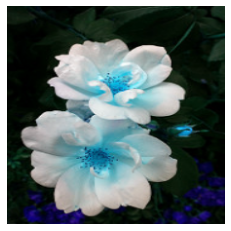

In [76]:
plt.axis('off')
plt.imshow(X[0])

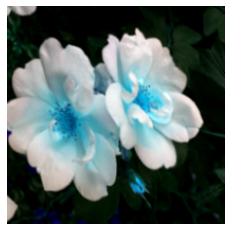

In [78]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [81]:
num_classes = 5
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, (3, 3), padding = 'same', strides=2, activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), padding = 'same', strides=2, activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding = 'same', strides=2, activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(250, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()  

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 112, 112, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 64)         

In [82]:
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
90/90 [==============================] - 25s 282ms/step - loss: 1.4710 - accuracy: 0.3341
Epoch 2/10
90/90 [==============================] - 29s 321ms/step - loss: 1.2549 - accuracy: 0.4601
Epoch 3/10
90/90 [==============================] - 26s 288ms/step - loss: 1.1190 - accuracy: 0.5325
Epoch 4/10
90/90 [==============================] - 30s 328ms/step - loss: 1.0541 - accuracy: 0.5670
Epoch 5/10
90/90 [==============================] - 36s 398ms/step - loss: 1.0345 - accuracy: 0.5858
Epoch 6/10
90/90 [==============================] - 36s 400ms/step - loss: 0.9782 - accuracy: 0.6164
Epoch 7/10
90/90 [==============================] - 38s 421ms/step - loss: 0.9460 - accuracy: 0.6310
Epoch 8/10
90/90 [==============================] - 36s 399ms/step - loss: 0.9168 - accuracy: 0.6324
Epoch 9/10
90/90 [==============================] - 36s 403ms/step - loss: 0.9058 - accuracy: 0.6422
Epoch 10/10
90/90 [==============================] - 37s 411ms/step - loss: 0.8630 - accura

In [83]:
model.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 1s 32ms/step - loss: 0.8353 - accuracy: 0.6898


[0.8353073000907898, 0.6898469924926758]

In [85]:
y_pred = model.predict(X_test_scaled)
y_pred_class = [np.argmax(ele) for ele in y_pred]

print("Classification \n ", classification_report(y_test, y_pred_class))

Classification 
                precision    recall  f1-score   support

           0       0.67      0.41      0.51       148
           1       0.72      0.75      0.73       111
           2       0.68      0.86      0.76       164
           3       0.74      0.84      0.79       141
           4       0.64      0.59      0.62       155

    accuracy                           0.69       719
   macro avg       0.69      0.69      0.68       719
weighted avg       0.69      0.69      0.68       719



### Pre Trained Model (transfer Learning)

In [89]:
#!pip install tensorflow_hub
import tensorflow_hub as hub

### Make predictions using ready made model (without any training)

In [90]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [91]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

### Now take pre-trained model and retrain it using flowers images

In [92]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [93]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [95]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

history = model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
90/90 [==============================] - 48s 535ms/step - loss: 0.7736 - acc: 0.7167
Epoch 2/5
90/90 [==============================] - 52s 577ms/step - loss: 0.4021 - acc: 0.8608
Epoch 3/5
90/90 [==============================] - 57s 634ms/step - loss: 0.3110 - acc: 0.8984
Epoch 4/5
90/90 [==============================] - 54s 606ms/step - loss: 0.2602 - acc: 0.9126
Epoch 5/5
90/90 [==============================] - 56s 622ms/step - loss: 0.2235 - acc: 0.9360


In [98]:
model.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 12s 541ms/step - loss: 0.3524 - acc: 0.8804


[0.35236725211143494, 0.8803894519805908]